## **1. Mount google drive**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **2. Import the necessary libraries**
---

In [3]:
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers

print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

Versions of key libraries
---
tensorflow:  2.2.0
numpy:       1.18.5
matplotlib:  3.2.2
sklearn:     0.22.2.post1


## **3.Create a function to plot image without axis**
---

In [4]:
def implt(img):
    plt.figure()
    plt.imshow(img)
    plt.axis('off')

print(implt)

<function implt at 0x7f7eef64e9d8>


## **4. Set matplotlib to have seaborn plot style**
---

In [5]:
plt.style.use('seaborn')                   # if want to use the default style, set 'classic'
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['figure.figsize']  = [7,7]   # Set the figure size to be 7 inch for (width,height)

print("Matplotlib setup completes.")

Matplotlib setup completes.


## **5. Prepare Cifar10 data for training and testing**
---
* Step 1: Load the cifar10 
* Step 2: Check the shape and type of the data
* Step 3: Convert the data into float32 and rescale the values from the range of 0\~255 into 0\~1
* Step 4: Retrieve the row size and the column size of each image
* Step 5: Perform one-hot enconding on the labels
* Step 6: Retrieve the number of classes in this problem

In [6]:
                                                                                # Step 1
data            = cifar10.load_data()
(trDat, trLbl)  = data[0]
(tsDat, tsLbl)  = data[1]

                                                                                # Step 2
print("The shape of trDat is", trDat.shape, "and the type of trDat is", trDat.dtype)
print("The shape of tsDat is", tsDat.shape, "and the type of tsDat is", tsDat.dtype)
print("")
print("The shape of trLbl is", trLbl.shape, "and the type of trLbl is", trLbl.dtype)
print("The shape of tsLbl is", tsLbl.shape, "and the type of tsLbl is", tsLbl.dtype)

                                                                                # Step 3
trDat           = trDat.astype('float32')/255
tsDat           = tsDat.astype('float32')/255

                                                                                # Step 4
imgrows         = trDat.shape[1]
imgclms         = trDat.shape[2]
channel         = trDat.shape[3]

                                                                                # Step 5
trLbl           = to_categorical(trLbl)
tsLbl           = to_categorical(tsLbl)
                               
num_classes     = tsLbl.shape[1]
print(num_classes)                                                # Step 6

170500096/170498071 [==============================] - 11s 0us/step
The shape of trDat is (50000, 32, 32, 3) and the type of trDat is uint8
The shape of tsDat is (10000, 32, 32, 3) and the type of tsDat is uint8

The shape of trLbl is (50000, 1) and the type of trLbl is uint8
The shape of tsLbl is (10000, 1) and the type of tsLbl is uint8
10


## **6. Define the cifarTwin model (to be completed)**
___
* Step 1: Setup the optimizer to be used for training
* Step 2: Set a name for the coming model (required for saving)
* Step 3: Define the convolutional neural network model (to be completed)
* Step 4: Create models for training and testing
* Step 5: Display the summary of the model of interest 

In [7]:
optmz       = optimizers.RMSprop(lr=0.0001)                                     # Step 1
modelname   = 'wks3_1_2'                                                        # Step 2

                                                                                # Step 3
def createModel():
   
    Lin = Input(shape=(32,32,3))
    Lx = Conv2D(32,(3,3),padding='same',activation='relu')(Lin)
    Lx = Conv2D(32,(3,3),padding='same',activation='relu')(Lx)
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Lx = Conv2D(48,(3,3),padding='same',activation='relu')(Lx)
    Lx = Conv2D(48,(3,3),padding='same',activation='relu')(Lx)
    Lx = MaxPooling2D(pool_size=(2,2))(Lx)
    Lx = Conv2D(64,(3,3),padding='same',activation='relu')(Lx)
    Lx = Conv2D(64,(3,3),padding='same',activation='relu')(Lx)
    
    Rin = Input(shape=(32,32,3))
    Rx = Conv2D(32,(3,3),padding='same',activation='relu')(Rin)
    Rx = Conv2D(32,(3,3),padding='same',activation='relu')(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    Rx = Conv2D(48,(3,3),padding='same',activation='relu')(Rx)
    Rx = Conv2D(48,(3,3),padding='same',activation='relu')(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    Rx = Conv2D(64,(3,3),padding='same',activation='relu')(Rx)
    Rx = Conv2D(64,(3,3),padding='same',activation='relu')(Rx)
    x = concatenate([Lx,Rx],axis=-1)
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = Flatten()(x)
    x = Dense(256,activation='relu')(x)
    x = Dense(10,activation='softmax')(x)
    model = Model(inputs=[Lin,Rin],outputs=x)
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optmz, 
                  metrics=['accuracy'])
    
    return model

                                                                                # Step 4
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()                                                                 # Step 5

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 32)   896         input_2[0][0]                    
______________________________________________________________________________________________

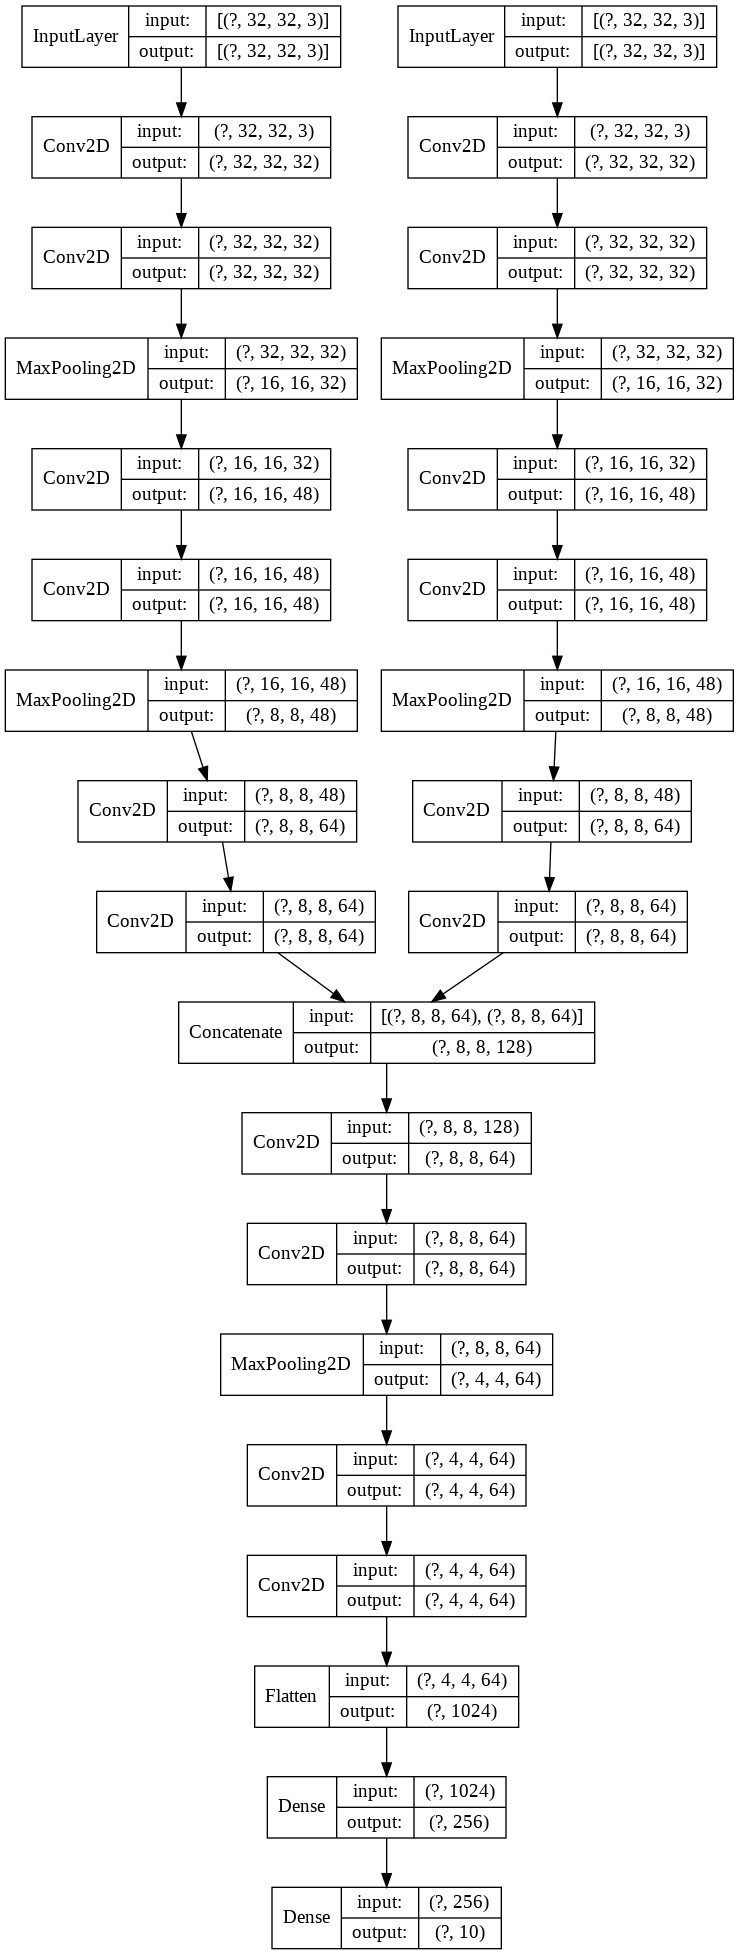

In [8]:
plot_model(model, 
           to_file='DualTw_model.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

## **7. Create the checkpoints to be applied during training**
---
* Step 1: Create a checkpoint to save the model from an epoch when validation accuracy is the highest
* Step 2: Create a checkpoint to save the training loss, training accuracy, validation loss and validation accuracy of each epoch into a csv file
* Step 3: Put the two checkpoint objects into a list

In [9]:
                                                                                # Step 1
folderpath      = '/content/drive/My Drive/iss/prumls/colab/'
filepath        = folderpath + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+modelname+'.csv')

Callbacks created:

Path to model: /content/drive/My Drive/iss/prumls/colab/wks3_1_2.hdf5
Path to log:   /content/drive/My Drive/iss/prumls/colab/wks3_1_2.csv


## **8. Train the deep learning model (to be completed)**
___

In [10]:
model.fit([trDat,trDat],                    # Training data
          trLbl,                            # Training label
          validation_data=([tsDat,tsDat], tsLbl),   # Validation data and label
          epochs=100,                       # The amount of epochs to be trained
          batch_size=128,                   
          shuffle=True,                     # To shuffle the training data
          callbacks=callbacks_list)         # Callbacks to execute the checkpoints

Epoch 1/100
391/391 [==============================] - 26s 66ms/step - loss: 1.9274 - accuracy: 0.2882 - val_loss: 1.7776 - val_accuracy: 0.3564
Epoch 2/100
391/391 [==============================] - 25s 65ms/step - loss: 1.6538 - accuracy: 0.3928 - val_loss: 1.5563 - val_accuracy: 0.4304
Epoch 3/100
391/391 [==============================] - 25s 65ms/step - loss: 1.5140 - accuracy: 0.4472 - val_loss: 1.5321 - val_accuracy: 0.4473
Epoch 4/100
391/391 [==============================] - 25s 65ms/step - loss: 1.3997 - accuracy: 0.4909 - val_loss: 1.4667 - val_accuracy: 0.4861
Epoch 5/100
391/391 [==============================] - 26s 66ms/step - loss: 1.3057 - accuracy: 0.5310 - val_loss: 1.2959 - val_accuracy: 0.5291
Epoch 6/100
391/391 [==============================] - 26s 66ms/step - loss: 1.2271 - accuracy: 0.5598 - val_loss: 1.2214 - val_accuracy: 0.5591
Epoch 7/100
391/391 [==============================] - 25s 65ms/step - loss: 1.1612 - accuracy: 0.5842 - val_loss: 1.1476 - val_ac

## **9. Validate the deep learning model**
---
* Step 1: Load the trained weights and compile the model
* Step 2: Make prediction


In [11]:
                                                                                # Step 1
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer=optmz, 
                metrics=['accuracy'])

predicts    = modelGo.predict([tsDat,tsDat])                                    # Step 2
print("Prediction completes.")

Prediction completes.


## **10. Report classification metrics**
---
* Step 1: Setup the label
* Step 2: Convert label from one-hot to integer
* Step 3: Calculate the accuracy score
* Step 4: Generate classification report

In [12]:
                                                                                # Step 1
labelname   = ['airplane',          # The label for reporting metrics
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']
                                                                                # Step 2
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 76.88%
              precision    recall  f1-score   support

    airplane     0.8050    0.7760    0.7902      1000
  automobile     0.8687    0.8600    0.8643      1000
        bird     0.7253    0.6390    0.6794      1000
         cat     0.6481    0.5580    0.5997      1000
        deer     0.6823    0.7880    0.7313      1000
         dog     0.6368    0.7310    0.6806      1000
        frog     0.8138    0.8350    0.8243      1000
       horse     0.8271    0.7990    0.8128      1000
        ship     0.8829    0.8370    0.8593      1000
       truck     0.8153    0.8650    0.8394      1000

    accuracy                         0.7688     10000
   macro avg     0.7705    0.7688    0.7681     10000
weighted avg     0.7705    0.7688    0.7681     10000



## **11. Print confusion matrix**
---

In [13]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[776  27  40  16  20   8  11  15  44  43]
 [  6 860   5   9   2   8   8   4  23  75]
 [ 52   4 639  41  98  74  48  26   9   9]
 [ 16   3  48 558  75 185  62  28  11  14]
 [ 14   2  46  40 788  33  33  36   4   4]
 [  8   1  26 113  56 731  17  38   3   7]
 [  8   2  30  39  41  29 835   7   3   6]
 [  6   2  26  28  64  65   3 799   0   7]
 [ 60  27  13  11   9   5   5   2 837  31]
 [ 18  62   8   6   2  10   4  11  14 865]]


## **12. Plot curves on validation loss and accuracy**
---

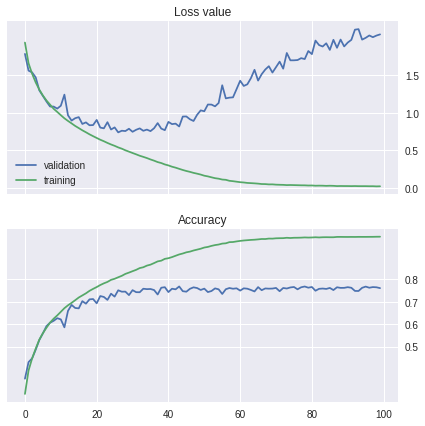

In [14]:
records     = pd.read_csv(folderpath+modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'], label="validation")
plt.plot(records['loss'],label="training")
plt.yticks([0.00,0.50,1.00,1.50])
plt.title('Loss value',fontsize=12)

ax          = plt.gca()
ax.set_xticklabels([])

plt.subplot(212)
plt.plot(records['val_accuracy'],label="validation")
plt.plot(records['accuracy'],label="training")
plt.yticks([0.5,0.6,0.7,0.8])
plt.title('Accuracy',fontsize=12)
ax.legend()
plt.show()

## **13. Save the model plot**
---

In [15]:
plotpath  = folderpath+modelname+'_plot.png'
plot_model(model, 
           to_file=plotpath, 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

print("Path to plot:", plotpath)

Path to plot: /content/drive/My Drive/iss/prumls/colab/wks3_1_2_plot.png
